## Importing Libraries

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_score, f1_score
import seaborn as sn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
from sklearn.model_selection import KFold

## Importing Expanded DPT Datasets

In [2]:
df = pd.read_excel("Datasets/DrNimaDPT Expanded Dataset.xlsx")
df['ln(CSR7.5)'] = np.log(df['CSR7.5'])
MSF = (df['Mw']/7.5)**(-2.56)
df['CSR'] = df['CSR7.5'] * MSF
df['ln(CSR)'] = np.log(df['CSR'])

In [3]:
df.columns

Index(['No.', 'Location', 'Mw', 'SD(Mw)', 'MSF', 'PGA (g)', 'SD(PGA)',
       'CSR7.5', 'SD(CSR7.5)', 'GC(%)', 'SD(GC)', 'N'120', 'SD(N'120)', 'N120',
       'Phi', 'Vs (m/s)', 'Vs1 (Corrected)', 'SD(Vs)', 'Vs1', 'Vs1,sk',
       'Vs1,sk corrected', 'σ'(KPa)', 'SD(σ')', 'σ(KPa)', 'SD(σ)', 'Ds (m)',
       'Liq?', 'FC%', 'CRR(Vs)And', 'CRR(Vs)2017', 'CRR(Vs)2017Vs1,sc',
       'CRR(corrected)And', 'CRR corrected2017', 'CRR(Vs1,sk)Anderus',
       'CRR(Cao)', 'SD(CRR)', 'CRR Nima Logistic', 'CRR Nima', 'rd', 'SDrd',
       'ln(CSR7.5)', 'CSR', 'ln(CSR)'],
      dtype='object')

In [4]:
print("Total Number of Datapoints Dataset: ", len(df))

Total Number of Datapoints Dataset:  110


In [5]:
df['Liq?'].value_counts()

1    69
0    41
Name: Liq?, dtype: int64

In [6]:
df.rename(columns = {"Liq?":"Liq"}, inplace = True)

In [7]:
df[["N'120","CSR7.5","Liq"]].describe()

,N'120,CSR7.5,Liq
count,110.000000,110.000000,110.000000
mean,15.979923,0.301207,0.627273
std,9.866782,0.126209,0.485743
min,3.900000,0.120000,0.000000
25%,9.000000,0.221820,0.000000
50%,13.757305,0.277500,1.000000
75%,19.878021,0.341840,1.000000
max,62.122996,0.770000,1.000000


<AxesSubplot:xlabel="N'120", ylabel='CSR7.5'>

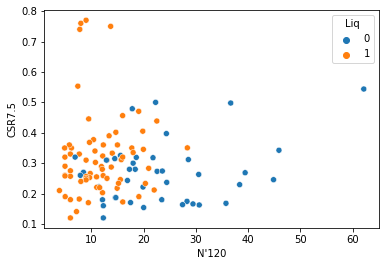

In [8]:
sn.scatterplot(x = df["N'120"], y = df["CSR7.5"], hue = df['Liq'])


## Using Pre-Trained Model

In [9]:
features = df[["N'120","CSR7.5"]]
target = df['Liq']

In [10]:
def MinMaxNormalization(data):
    # MinMax Normalization
    scaler = MinMaxScaler()
    # fit scaler on data
    scaler.fit(data)
    # apply transform
    minmax_normalized = scaler.transform(data)
    return minmax_normalized

In [11]:
normalized_features = MinMaxNormalization(features)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(normalized_features, target, test_size = 0.8)

In [13]:
pre_trained_model = tf.keras.models.load_model('main_model.h5')
pre_trained_model.fit(X_train, y_train, epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 413ms/step - loss: 0.4347 - accuracy: 0.8182
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4346 - accuracy: 0.8182
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4343 - accuracy: 0.8182
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4337 - accuracy: 0.8182
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4330 - accuracy: 0.8182
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8182
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.8182
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8182
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4290 - accuracy: 0.8182
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4278 - accuracy: 0.8182
Epoch 11/500
1/1 [=========

1/1 [==============================] - 0s 3ms/step - loss: 0.3922 - accuracy: 0.8636
Epoch 85/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8636
Epoch 86/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3918 - accuracy: 0.8636
Epoch 87/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3917 - accuracy: 0.8636
Epoch 88/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3915 - accuracy: 0.8636
Epoch 89/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3913 - accuracy: 0.8636
Epoch 90/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3912 - accuracy: 0.8636
Epoch 91/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8636
Epoch 92/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 93/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3907 - accuracy: 0.8636
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8636
Epoch 168/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3813 - accuracy: 0.8636
Epoch 169/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3812 - accuracy: 0.8636
Epoch 170/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3811 - accuracy: 0.8636
Epoch 171/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8636
Epoch 172/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8636
Epoch 173/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8636
Epoch 174/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3808 - accuracy: 0.8636
Epoch 175/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8636
Epoch 176/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3806 - accuracy: 0.8636
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8636
Epoch 250/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3754 - accuracy: 0.8636
Epoch 251/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.8636
Epoch 252/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3753 - accuracy: 0.8636
Epoch 253/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3752 - accuracy: 0.8636
Epoch 254/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3751 - accuracy: 0.8636
Epoch 255/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8636
Epoch 256/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3750 - accuracy: 0.8636
Epoch 257/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8636
Epoch 258/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3749 - accuracy: 0.8636
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8636
Epoch 332/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3718 - accuracy: 0.8636
Epoch 333/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8636
Epoch 334/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8636
Epoch 335/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3717 - accuracy: 0.8636
Epoch 336/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8636
Epoch 337/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3716 - accuracy: 0.8636
Epoch 338/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8636
Epoch 339/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8636
Epoch 340/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8636
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.8182
Epoch 414/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3695 - accuracy: 0.8182
Epoch 415/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3695 - accuracy: 0.8182
Epoch 416/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8182
Epoch 417/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8182
Epoch 418/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8182
Epoch 419/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8182
Epoch 420/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3693 - accuracy: 0.8182
Epoch 421/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3693 - accuracy: 0.8182
Epoch 422/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3693 - accuracy: 0.8182
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8182
Epoch 496/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8182
Epoch 497/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8182
Epoch 498/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8182
Epoch 499/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8182
Epoch 500/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3678 - accuracy: 0.8182


In [14]:
test_loss, test_accuracy = pre_trained_model.evaluate(normalized_features, target)

4/4 [==============================] - 0s 2ms/step - loss: 0.4695 - accuracy: 0.7545


In [15]:
y_predictions = pre_trained_model.predict(normalized_features)

In [16]:
for i in range(len(y_predictions)):
    if y_predictions[i] < 0.5:
        y_predictions[i] = 0
    else:
        y_predictions[i] = 1

In [17]:
print("RECALL = ",recall_score(target, y_predictions))

RECALL =  0.9130434782608695


In [18]:
print("ACCURACY = ",accuracy_score(target, y_predictions))

ACCURACY =  0.7545454545454545


In [19]:
print("Precision = ",precision_score(target, y_predictions))

Precision =  0.75


In [20]:
print("F1Score = ",f1_score(target, y_predictions))

F1Score =  0.8235294117647057


<AxesSubplot:>

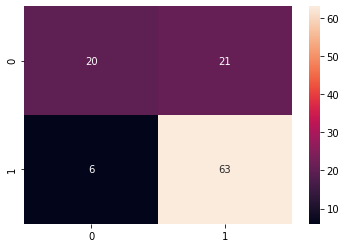

In [21]:
sn.heatmap(confusion_matrix(target, y_predictions), annot = True)

In [22]:
## Without Fine-tune the pre-trained model
# RECALL =  0.9420289855072463
# ACCURACY =  0.7545454545454545

In [23]:
#Cross Validation Score


kf = KFold(n_splits = 5, shuffle = True)
accuracies = []
recalls = []
f1scores = []
precisions = []
for train, test in kf.split(df[["N'120",'CSR7.5','Liq']]):

    train_df = df.loc[train]
    test_df = df.loc[test]
    
    pre_trained_model = tf.keras.models.load_model('main_model.h5')
    pre_trained_model.fit(MinMaxNormalization(test_df[["N'120",'CSR7.5']]),  test_df['Liq'].astype(np.float32), epochs = 500)


    y_predictions = pre_trained_model.predict(MinMaxNormalization(train_df[["N'120",'CSR7.5']]))
    for i in range(len(y_predictions)):
        if y_predictions[i] < 0.5:
            y_predictions[i] = 0
        else:
            y_predictions[i] = 1

    accuracies.append(accuracy_score(train_df['Liq'].astype(np.float32), y_predictions))
    recalls.append(recall_score(train_df['Liq'].astype(np.float32), y_predictions))
    f1scores.append(f1_score(train_df['Liq'].astype(np.float32), y_predictions))
    precisions.append(precision_score(train_df['Liq'].astype(np.float32), y_predictions))

print("Accuracies:", accuracies)
print("Recalls:", recalls)
print("f1scores:", f1scores)
print("precisions:", precisions)

Epoch 1/500
1/1 [==============================] - 0s 288ms/step - loss: 0.3676 - accuracy: 0.8636
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.8636
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3675 - accuracy: 0.8636
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3673 - accuracy: 0.8636
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3671 - accuracy: 0.8636
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3668 - accuracy: 0.8636
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3665 - accuracy: 0.8636
Epoch 8/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8636
Epoch 9/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3657 - accuracy: 0.8636
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8636
Epoch 11/500
1/1 [=========

1/1 [==============================] - 0s 2ms/step - loss: 0.3457 - accuracy: 0.9091
Epoch 85/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.9091
Epoch 86/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.9091
Epoch 87/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3454 - accuracy: 0.9091
Epoch 88/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.9091
Epoch 89/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3451 - accuracy: 0.9091
Epoch 90/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.9091
Epoch 91/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3450 - accuracy: 0.9091
Epoch 92/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3449 - accuracy: 0.9091
Epoch 93/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3448 - accuracy: 0.9091
Epoch 94/500
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.9091
Epoch 168/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3421 - accuracy: 0.9091
Epoch 169/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.9091
Epoch 170/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3421 - accuracy: 0.9091
Epoch 171/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3420 - accuracy: 0.9091
Epoch 172/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.9091
Epoch 173/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3420 - accuracy: 0.9091
Epoch 174/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.9091
Epoch 175/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.9091
Epoch 176/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.9091
Epoch 177/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.3397 - accuracy: 0.9091
Epoch 250/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3397 - accuracy: 0.9091
Epoch 251/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3397 - accuracy: 0.9091
Epoch 252/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.9091
Epoch 253/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.9091
Epoch 254/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.9091
Epoch 255/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.9091
Epoch 256/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.9091
Epoch 257/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.9091
Epoch 258/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3395 - accuracy: 0.9091
Epoch 259/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.9091
Epoch 332/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.9091
Epoch 333/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.9091
Epoch 334/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.9091
Epoch 335/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.9091
Epoch 336/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.9091
Epoch 337/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.9091
Epoch 338/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.9091
Epoch 339/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3372 - accuracy: 0.9091
Epoch 340/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3372 - accuracy: 0.9091
Epoch 341/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.9091
Epoch 414/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3352 - accuracy: 0.9091
Epoch 415/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.9091
Epoch 416/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.9091
Epoch 417/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.9091
Epoch 418/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.9091
Epoch 419/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.9091
Epoch 420/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.9091
Epoch 421/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3350 - accuracy: 0.9091
Epoch 422/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.9091
Epoch 423/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.3330 - accuracy: 0.9091
Epoch 496/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3330 - accuracy: 0.9091
Epoch 497/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.9091
Epoch 498/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.9091
Epoch 499/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.9091
Epoch 500/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3329 - accuracy: 0.9091
Epoch 1/500
1/1 [==============================] - 0s 426ms/step - loss: 0.4023 - accuracy: 0.8636
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 0.4023 - accuracy: 0.8636
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.8636
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4022 - accuracy: 0.8636
Epoch 5/500
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 0.8636
Epoch 79/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3973 - accuracy: 0.8636
Epoch 80/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3973 - accuracy: 0.8636
Epoch 81/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3972 - accuracy: 0.8636
Epoch 82/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8636
Epoch 83/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3972 - accuracy: 0.8636
Epoch 84/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3971 - accuracy: 0.8636
Epoch 85/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3971 - accuracy: 0.8636
Epoch 86/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.8636
Epoch 87/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3970 - accuracy: 0.8636
Epoch 88/500
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8636
Epoch 162/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3947 - accuracy: 0.8636
Epoch 163/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8636
Epoch 164/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8636
Epoch 165/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3946 - accuracy: 0.8636
Epoch 166/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3946 - accuracy: 0.8636
Epoch 167/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3945 - accuracy: 0.8636
Epoch 168/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8636
Epoch 169/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3945 - accuracy: 0.8636
Epoch 170/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3945 - accuracy: 0.8636
Epoch 171/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.3932 - accuracy: 0.8636
Epoch 244/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3932 - accuracy: 0.8636
Epoch 245/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3932 - accuracy: 0.8636
Epoch 246/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3932 - accuracy: 0.8636
Epoch 247/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8636
Epoch 248/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8636
Epoch 249/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8636
Epoch 250/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.8636
Epoch 251/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8636
Epoch 252/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3931 - accuracy: 0.8636
Epoch 253/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8636
Epoch 326/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3920 - accuracy: 0.8636
Epoch 327/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.8636
Epoch 328/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8636
Epoch 329/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8636
Epoch 330/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3919 - accuracy: 0.8636
Epoch 331/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8636
Epoch 332/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8636
Epoch 333/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8636
Epoch 334/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3919 - accuracy: 0.8636
Epoch 335/500
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 0.3909 - accuracy: 0.8636
Epoch 408/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 409/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 410/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 411/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 412/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 413/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 414/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 415/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3908 - accuracy: 0.8636
Epoch 416/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3907 - accuracy: 0.8636
Epoch 417/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 490/500
1/1 [==============================] - 0s 6ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 491/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 492/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 493/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 494/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 495/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 496/500
1/1 [==============================] - 0s 5ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 497/500
1/1 [==============================] - 0s 4ms/step - loss: 0.3901 - accuracy: 0.8636
Epoch 498/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8636
Epoch 499/500
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 0.6015 - accuracy: 0.7273
Epoch 73/500
1/1 [==============================] - 0s 3ms/step - loss: 0.6009 - accuracy: 0.7273
Epoch 74/500
1/1 [==============================] - 0s 2ms/step - loss: 0.6003 - accuracy: 0.7273
Epoch 75/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5996 - accuracy: 0.7273
Epoch 76/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5990 - accuracy: 0.7273
Epoch 77/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5984 - accuracy: 0.7273
Epoch 78/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5979 - accuracy: 0.7273
Epoch 79/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.7273
Epoch 80/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.7273
Epoch 81/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5962 - accuracy: 0.7273
Epoch 82/500
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.5617 - accuracy: 0.7273
Epoch 156/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.7273
Epoch 157/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.7273
Epoch 158/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5612 - accuracy: 0.7273
Epoch 159/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5611 - accuracy: 0.7273
Epoch 160/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5610 - accuracy: 0.6818
Epoch 161/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.6818
Epoch 162/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.6818
Epoch 163/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.6818
Epoch 164/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5605 - accuracy: 0.6818
Epoch 165/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.5570 - accuracy: 0.7273
Epoch 238/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7273
Epoch 239/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7273
Epoch 240/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.7273
Epoch 241/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5569 - accuracy: 0.7273
Epoch 242/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5568 - accuracy: 0.7273
Epoch 243/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5568 - accuracy: 0.7273
Epoch 244/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5568 - accuracy: 0.7273
Epoch 245/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7273
Epoch 246/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5567 - accuracy: 0.7273
Epoch 247/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7273
Epoch 320/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5548 - accuracy: 0.7273
Epoch 321/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7273
Epoch 322/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7273
Epoch 323/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5547 - accuracy: 0.7273
Epoch 324/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5547 - accuracy: 0.7273
Epoch 325/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.7273
Epoch 326/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5546 - accuracy: 0.7273
Epoch 327/500
1/1 [==============================] - 0s 4ms/step - loss: 0.5546 - accuracy: 0.7273
Epoch 328/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5546 - accuracy: 0.7273
Epoch 329/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.5533 - accuracy: 0.7273
Epoch 402/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5532 - accuracy: 0.7273
Epoch 403/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7273
Epoch 404/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7273
Epoch 405/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7273
Epoch 406/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7273
Epoch 407/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.7273
Epoch 408/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7273
Epoch 409/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7273
Epoch 410/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5531 - accuracy: 0.7273
Epoch 411/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7273
Epoch 484/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7273
Epoch 485/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7273
Epoch 486/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7273
Epoch 487/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7273
Epoch 488/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7273
Epoch 489/500
1/1 [==============================] - 0s 3ms/step - loss: 0.5521 - accuracy: 0.7273
Epoch 490/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7273
Epoch 491/500
1/1 [==============================] - 0s 2ms/step - loss: 0.5520 - accuracy: 0.7273
Epoch 492/500
1/1 [==============================] - 0s 999us/step - loss: 0.5520 - accuracy: 0.7273
Epoch 493/500
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.4382 - accuracy: 0.8182
Epoch 67/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.8182
Epoch 68/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4380 - accuracy: 0.8182
Epoch 69/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4378 - accuracy: 0.8182
Epoch 70/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.8182
Epoch 71/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4376 - accuracy: 0.8182
Epoch 72/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.8182
Epoch 73/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4374 - accuracy: 0.8182
Epoch 74/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4373 - accuracy: 0.8182
Epoch 75/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8182
Epoch 76/500
1/1 [===============

1/1 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8182
Epoch 150/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.8182
Epoch 151/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.8636
Epoch 152/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8636
Epoch 153/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.8636
Epoch 154/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4309 - accuracy: 0.8636
Epoch 155/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8636
Epoch 156/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8636
Epoch 157/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8636
Epoch 158/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4307 - accuracy: 0.8636
Epoch 159/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8636
Epoch 232/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.8636
Epoch 233/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8636
Epoch 234/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8636
Epoch 235/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8636
Epoch 236/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4265 - accuracy: 0.8636
Epoch 237/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8636
Epoch 238/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8636
Epoch 239/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8636
Epoch 240/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4263 - accuracy: 0.8636
Epoch 241/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.4236 - accuracy: 0.8636
Epoch 314/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 315/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 316/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 317/500
1/1 [==============================] - 0s 1ms/step - loss: 0.4235 - accuracy: 0.8636
Epoch 318/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8636
Epoch 319/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8636
Epoch 320/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4234 - accuracy: 0.8636
Epoch 321/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4233 - accuracy: 0.8636
Epoch 322/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4233 - accuracy: 0.8636
Epoch 323/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.4214 - accuracy: 0.8636
Epoch 396/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8636
Epoch 397/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4213 - accuracy: 0.8636
Epoch 398/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8636
Epoch 399/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8636
Epoch 400/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 401/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 402/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 403/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4212 - accuracy: 0.8636
Epoch 404/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8636
Epoch 405/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 478/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 479/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 480/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 481/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8636
Epoch 482/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8636
Epoch 483/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8636
Epoch 484/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8636
Epoch 485/500
1/1 [==============================] - 0s 3ms/step - loss: 0.4196 - accuracy: 0.8636
Epoch 486/500
1/1 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8636
Epoch 487/500
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.8182
Epoch 54/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3513 - accuracy: 0.8182
Epoch 55/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3511 - accuracy: 0.8182
Epoch 56/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3508 - accuracy: 0.8182
Epoch 57/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3506 - accuracy: 0.8182
Epoch 58/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3504 - accuracy: 0.8182
Epoch 59/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.8182
Epoch 60/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3500 - accuracy: 0.8182
Epoch 61/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8182
Epoch 62/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3496 - accuracy: 0.8182
Epoch 63/500
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8636
Epoch 137/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3360 - accuracy: 0.8636
Epoch 138/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8636
Epoch 139/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3357 - accuracy: 0.8636
Epoch 140/500
1/1 [==============================] - 0s 990us/step - loss: 0.3356 - accuracy: 0.8636
Epoch 141/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8636
Epoch 142/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8636
Epoch 143/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3351 - accuracy: 0.8636
Epoch 144/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3350 - accuracy: 0.8636
Epoch 145/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.8636
Epoch 146/500
1/1 [===

1/1 [==============================] - 0s 4ms/step - loss: 0.3257 - accuracy: 0.8636
Epoch 219/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3256 - accuracy: 0.8636
Epoch 220/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.8636
Epoch 221/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3254 - accuracy: 0.8636
Epoch 222/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8636
Epoch 223/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8636
Epoch 224/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8636
Epoch 225/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.8636
Epoch 226/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8636
Epoch 227/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8636
Epoch 228/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8636
Epoch 301/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8636
Epoch 302/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3181 - accuracy: 0.8636
Epoch 303/500
1/1 [==============================] - 0s 998us/step - loss: 0.3180 - accuracy: 0.8636
Epoch 304/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8636
Epoch 305/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3179 - accuracy: 0.8636
Epoch 306/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3178 - accuracy: 0.8636
Epoch 307/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8636
Epoch 308/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8636
Epoch 309/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3176 - accuracy: 0.8636
Epoch 310/500
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8636
Epoch 383/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3127 - accuracy: 0.8636
Epoch 384/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8636
Epoch 385/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8636
Epoch 386/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8636
Epoch 387/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8636
Epoch 388/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8636
Epoch 389/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8636
Epoch 390/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3123 - accuracy: 0.8636
Epoch 391/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.8636
Epoch 392/500
1/1 [=====

1/1 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8636
Epoch 465/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8636
Epoch 466/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3098 - accuracy: 0.8636
Epoch 467/500
1/1 [==============================] - 0s 3ms/step - loss: 0.3098 - accuracy: 0.8636
Epoch 468/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8636
Epoch 469/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8636
Epoch 470/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8636
Epoch 471/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8636
Epoch 472/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8636
Epoch 473/500
1/1 [==============================] - 0s 2ms/step - loss: 0.3096 - accuracy: 0.8636
Epoch 474/500
1/1 [=====

## Dr Nima's Model

In [24]:
PL_Nima = pd.DataFrame(1 / (1 + np.exp(-5.721 + (0.208 * df["N'120"]) - (1.772 * df["ln(CSR7.5)"])  )), columns = ['PL'] )

In [25]:
for i in range(len(PL_Nima)):
    if PL_Nima.loc[i,'PL'] > 0.5:
        PL_Nima.loc[i,'Liq'] = 1
    else:
        PL_Nima.loc[i,'Liq'] = 0

In [26]:
PL_Nima.sample(5)

,PL,Liq
7,0.650091,1.0
37,0.766231,1.0
46,0.252320,0.0
33,0.659354,1.0
80,0.794495,1.0


In [27]:
print("Dr.Nima's accuracy: ", accuracy_score(df['Liq'], PL_Nima['Liq']))
print("Dr.Nima's recall: ", recall_score(df['Liq'], PL_Nima['Liq']))
print("Dr.Nima's precision: ", precision_score(df['Liq'], PL_Nima['Liq']))
print("Dr.Nima's f1-score: ", f1_score(df['Liq'], PL_Nima['Liq']))

Dr.Nima's accuracy:  0.8090909090909091
Dr.Nima's recall:  0.8260869565217391
Dr.Nima's precision:  0.8636363636363636
Dr.Nima's f1-score:  0.8444444444444444


<AxesSubplot:>

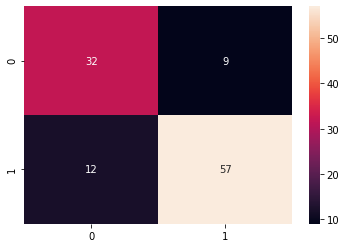

In [28]:
sn.heatmap(confusion_matrix(df['Liq'], PL_Nima['Liq']), annot = True)

## Cao 2013 Model

In [29]:
PL_Cao = pd.DataFrame(1 / (1 + np.exp(-8.40 + (0.35 * df["N'120"]) - (2.12 * df["ln(CSR)"])  )), columns = ['PL'] )

In [30]:
for i in range(len(PL_Cao)):
    if PL_Cao.loc[i,'PL'] > 0.5:
        PL_Cao.loc[i,'Liq'] = 1
    else:
        PL_Cao.loc[i,'Liq'] = 0

In [31]:
PL_Cao.sample(5)

,PL,Liq
17,0.424998,0.0
64,0.004822,0.0
44,0.738878,1.0
96,0.962011,1.0
42,0.053154,0.0


In [32]:
print("Cao 2013 accuracy: ", accuracy_score(df['Liq'], PL_Cao['Liq']))
print("Cao 2013 recall: ", recall_score(df['Liq'], PL_Cao['Liq']))
print("Cao 2013 precision: ", precision_score(df['Liq'], PL_Cao['Liq']))
print("Cao 2013 f1-score: ", f1_score(df['Liq'], PL_Cao['Liq']))

Cao 2013 accuracy:  0.7636363636363637
Cao 2013 recall:  0.7971014492753623
Cao 2013 precision:  0.8208955223880597
Cao 2013 f1-score:  0.8088235294117647


<AxesSubplot:>

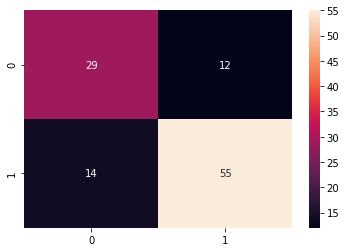

In [33]:
sn.heatmap(confusion_matrix(df['Liq'], PL_Cao['Liq']), annot = True)